# Project: News Article Recommender System

### Importing all Necessary libraries

In [97]:
import pandas as pd
# Below libraries are for text processing using NLTK
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Below libraries are for feature representation using sklearn
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Below libraries are for similarity matrices using sklearn
from sklearn.metrics.pairwise import cosine_similarity 

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

[nltk_data] Downloading package wordnet to C:\Users\Silicon
[nltk_data]     computers\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [98]:
!pip install nltk

In [99]:
import nltk

In [100]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Silicon
[nltk_data]     computers\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Silicon
[nltk_data]     computers\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Silicon
[nltk_data]     computers\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Load the Data

In [101]:
news_articles = pd.read_csv("NEWS_ARTICLES_DATA.csv")
news_articles

,Headline,Category,Description
0,There Were 2 Mass Shootings In Texas Last Week...,CRIME,She left her husband. He killed their children...
1,Will Smith Joins Diplo And Nicky Jam For The 2...,ENTERTAINMENT,Of course it has a song.
2,Hugh Grant Marries For The First Time At Age 57,ENTERTAINMENT,The actor and his longtime girlfriend Anna Ebe...
3,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,ENTERTAINMENT,The actor gives Dems an ass-kicking for not fi...
4,Julianna Margulies Uses Donald Trump Poop Bags...,ENTERTAINMENT,"The ""Dietland"" actress said using the bags is ..."
...,...,...,...
244,"Sorry, Ben Affleck, Make Way For Justin Therou...",ENTERTAINMENT,Ther-oh-my-God!
245,Hillary Clinton Tips A Russian Hat At Trump Du...,POLITICS,"If you can't beat 'em, join 'em,"" Clinton said..."
246,Giuliani Says Mueller Can't Talk To Trump Unti...,POLITICS,We can't let our guy go in and be questioned w...
247,60 Minutes' Reporter Reveals Trump's Chilling ...,MEDIA,Lesley Stahl said Trump admitted that he attac...


In [102]:
news_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headline     249 non-null    object
 1   Category     249 non-null    object
 2   Description  249 non-null    object
dtypes: object(3)
memory usage: 3.0+ KB


In [103]:
news_articles.isnull().sum()

Headline       0
Category       0
Description    0
dtype: int64

# To show New column we added

In [104]:
news_articles['CategoryId'] = news_articles['Category'].factorize()[0]
news_articles.head()

,Headline,Category,Description,CategoryId
0,There Were 2 Mass Shootings In Texas Last Week...,CRIME,She left her husband. He killed their children...,0
1,Will Smith Joins Diplo And Nicky Jam For The 2...,ENTERTAINMENT,Of course it has a song.,1
2,Hugh Grant Marries For The First Time At Age 57,ENTERTAINMENT,The actor and his longtime girlfriend Anna Ebe...,1
3,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,ENTERTAINMENT,The actor gives Dems an ass-kicking for not fi...,1
4,Julianna Margulies Uses Donald Trump Poop Bags...,ENTERTAINMENT,"The ""Dietland"" actress said using the bags is ...",1


# To show category's name with respect to category id

In [105]:
# Create a new pandas dataframe "category", which only has unique Categories, also sorting this list in order of CategoryId values
category = news_articles[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
category

,Category,CategoryId
0,CRIME,0
1,ENTERTAINMENT,1
11,WORLD NEWS,2
12,IMPACT,3
13,POLITICS,4
20,WEIRD NEWS,5
27,BLACK VOICES,6
35,WOMEN,7
37,COMEDY,8
50,ENTERTAINMENT,9


# show category id in dictionary form

In [106]:
# Create a dictionary ( python datastructure - like a lookup table) that 
# can easily convert category names into category_ids and vice-versa
category_to_id = dict(category.values)
id_to_category = dict(category[['CategoryId', 'Category']].values)
id_to_category

{0: 'CRIME',
 1: 'ENTERTAINMENT',
 2: 'WORLD NEWS',
 3: 'IMPACT',
 4: 'POLITICS',
 5: 'WEIRD NEWS',
 6: 'BLACK VOICES',
 7: 'WOMEN',
 8: 'COMEDY',
 9: ' ENTERTAINMENT',
 10: 'QUEER VOICES',
 11: 'SPORTS',
 12: 'BUSINESS',
 13: 'ENTERTAINMENT ',
 14: 'TRAVEL',
 15: 'MEDIA',
 16: 'TECH',
 17: 'RELIGION',
 18: 'SCIENCE',
 19: 'Black Voices',
 20: 'Wold News'}

# Convert Category names into numerical index

In [107]:
# Associate Category names with numerical index and save it in new column CategoryId
target_category = news_articles['Category'].unique()
print(target_category)

['CRIME' 'ENTERTAINMENT' 'WORLD NEWS' 'IMPACT' 'POLITICS' 'WEIRD NEWS'
 'BLACK VOICES' 'WOMEN' 'COMEDY' ' ENTERTAINMENT' 'QUEER VOICES' 'SPORTS'
 'BUSINESS' 'ENTERTAINMENT ' 'TRAVEL' 'MEDIA' 'TECH' 'RELIGION' 'SCIENCE'
 'Black Voices' 'Wold News']


# Visulaizing the category data

<AxesSubplot:xlabel='Category'>

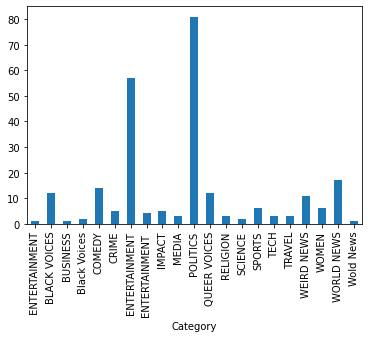

In [108]:
news_articles.groupby('Category').CategoryId.count().plot.bar(ylim = 0)

# visualizing category data in numeric form

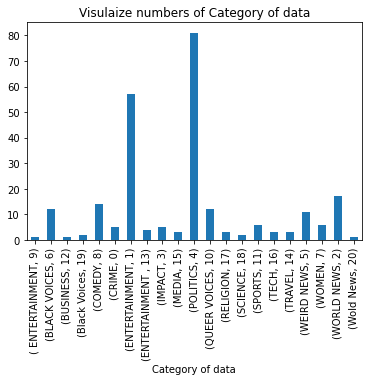

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
news_articles.groupby('Category').CategoryId.value_counts().plot(kind = "bar")
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

# Printing text column of dataset

In [110]:
data=news_articles["Headline"]
data.head(10)

0    There Were 2 Mass Shootings In Texas Last Week...
1    Will Smith Joins Diplo And Nicky Jam For The 2...
2      Hugh Grant Marries For The First Time At Age 57
3    Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4    Julianna Margulies Uses Donald Trump Poop Bags...
5    Morgan Freeman 'Devastated' That Sexual Harass...
6    Donald Trump Is Lovin' New McDonald's Jingle I...
7    What To Watch On Amazon Prime That\u2019s New ...
8    Mike Myers Reveals He'd 'Like To' Do A Fourth ...
9           What To Watch On Hulu That's New This Week
Name: Headline, dtype: object

# Printing category coulmn of dataset

In [111]:
category = news_articles['Category']
category.head(10)

0            CRIME
1    ENTERTAINMENT
2    ENTERTAINMENT
3    ENTERTAINMENT
4    ENTERTAINMENT
5    ENTERTAINMENT
6    ENTERTAINMENT
7    ENTERTAINMENT
8    ENTERTAINMENT
9    ENTERTAINMENT
Name: Category, dtype: object

# DATA PREPROCESSING

In [112]:
#set(stopwords.words('english'))

In [113]:
news_articles['Headline'][0]

'There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV'

In [114]:
words=word_tokenize(news_articles['Headline'][0])[:]
words

['There',
 'Were',
 '2',
 'Mass',
 'Shootings',
 'In',
 'Texas',
 'Last',
 'Week',
 ',',
 'But',
 'Only',
 '1',
 'On',
 'TV']

# Remove Comma's

In [115]:
alphabet=[word for word in words if word.isalpha()]
alphabet

['There',
 'Were',
 'Mass',
 'Shootings',
 'In',
 'Texas',
 'Last',
 'Week',
 'But',
 'Only',
 'On',
 'TV']

# Convert in Lower Case

In [116]:
stop_words = set(stopwords.words('english'))
words=[word.lower() for word in words if word.lower() not in stop_words]
words

['2', 'mass', 'shootings', 'texas', 'last', 'week', ',', '1', 'tv']

# Rejoin the Words

In [117]:
' '.join(words)

'2 mass shootings texas last week , 1 tv'

# Combining Whole Function

In [118]:
# Preprocess

def clean_text(sent):
  stop_words = set(stopwords.words('english'))

  words = word_tokenize(sent)
  words = [word for word in words if word.isalpha()]
  words = [word.lower() for word in words if word.lower() not in stop_words]

  return ' '.join(words)

In [119]:
clean_text(news_articles['Headline'][0])

'mass shootings texas last week tv'

# Cleaning Text of Headline Column

In [120]:
news_articles['Headline'] = news_articles['Headline'].apply(clean_text)

In [121]:
news_articles.head()

,Headline,Category,Description,CategoryId
0,mass shootings texas last week tv,CRIME,She left her husband. He killed their children...,0
1,smith joins diplo nicky jam world cup official...,ENTERTAINMENT,Of course it has a song.,1
2,hugh grant marries first time age,ENTERTAINMENT,The actor and his longtime girlfriend Anna Ebe...,1
3,jim carrey blasts adam schiff democrats new ar...,ENTERTAINMENT,The actor gives Dems an ass-kicking for not fi...,1
4,julianna margulies uses donald trump poop bags...,ENTERTAINMENT,"The ""Dietland"" actress said using the bags is ...",1


In [122]:
data=news_articles['Headline']

In [123]:
news_articles.shape

(249, 4)

# Lemmatizing the Words

In [124]:
#def lemmatize_word(text):
  #wordnet = WordNetLemmatizer()
  #return " ".join([wordnet.lemmatize(word) for word in text])
#news_articles['Headline'] = news_articles['Headline'].apply(lemmatize_word)
#news_articles['Headline'][1]

# remove all tags

In [125]:
import re
def remove_tags(data):
  remove = re.compile(r'<.*?>')
  return re.sub(remove, '', data)

news_articles['Headline'] = news_articles['Headline'].apply(remove_tags)
news_articles['Headline'][:]

0                      mass shootings texas last week tv
1      smith joins diplo nicky jam world cup official...
2                      hugh grant marries first time age
3      jim carrey blasts adam schiff democrats new ar...
4      julianna margulies uses donald trump poop bags...
                             ...                        
244    sorry ben affleck make way justin theroux gian...
245    hillary clinton tips russian hat trump yale co...
246    giuliani says mueller ca talk trump trump hear...
247    minutes reporter reveals trump chilling reason...
248            call cops watch powerful monologue racism
Name: Headline, Length: 249, dtype: object

# After Cleaning Text our Dataset

In [126]:
news_articles

,Headline,Category,Description,CategoryId
0,mass shootings texas last week tv,CRIME,She left her husband. He killed their children...,0
1,smith joins diplo nicky jam world cup official...,ENTERTAINMENT,Of course it has a song.,1
2,hugh grant marries first time age,ENTERTAINMENT,The actor and his longtime girlfriend Anna Ebe...,1
3,jim carrey blasts adam schiff democrats new ar...,ENTERTAINMENT,The actor gives Dems an ass-kicking for not fi...,1
4,julianna margulies uses donald trump poop bags...,ENTERTAINMENT,"The ""Dietland"" actress said using the bags is ...",1
...,...,...,...,...
244,sorry ben affleck make way justin theroux gian...,ENTERTAINMENT,Ther-oh-my-God!,1
245,hillary clinton tips russian hat trump yale co...,POLITICS,"If you can't beat 'em, join 'em,"" Clinton said...",4
246,giuliani says mueller ca talk trump trump hear...,POLITICS,We can't let our guy go in and be questioned w...,4
247,minutes reporter reveals trump chilling reason...,MEDIA,Lesley Stahl said Trump admitted that he attac...,15


# Create TfidfVectorizer object

In [127]:
# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of tf-idf vectors
tfidf_matrix = vectorizer.fit_transform(data)

In [128]:
tfidf_matrix.shape

(249, 1272)

# NFM for Topic Modelling

# Build the TF-IDF Matrix

In [129]:
# Create an NMF instance: model
# the  components will be the topics
model = NMF(n_components=5, random_state=5)
 
# Fit the model to TF-IDF
model.fit(tfidf_matrix)
 
# Transform the TF-IDF: nmf_features
nmf_features = model.transform(tfidf_matrix)

In [130]:
nmf_features.shape

(249, 5)

In [131]:
model.components_.shape

(5, 1272)

In [132]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=vectorizer.get_feature_names())
components_df

,abandons,abortion,abrams,abroad,abruptly,abuse,abused,access,accessing,accident,...,would,writer,writers,yacht,yale,year,yet,york,youth,zinke
0,0.001134,0.000667,0.000000,0.002220,0.12245,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000332,0.000000,0.000000,0.001155,0.000000,0.000000,0.000000,0.000000,0.000878
1,0.001257,0.075417,0.000000,0.023956,0.00000,0.005608,0.002011,0.009250,0.001607,0.0,...,0.000000,0.034509,0.000554,0.000000,0.024829,0.002267,0.001201,0.048453,0.002252,0.002886
2,0.000215,0.000000,0.000000,0.000000,0.00000,0.046381,0.000000,0.000000,0.000000,0.0,...,0.078034,0.000000,0.000000,0.006582,0.000000,0.000000,0.002033,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.00000,0.016507,0.000011,0.000000,0.006628,0.0,...,0.000000,0.007240,0.000000,0.014297,0.000000,0.002696,0.000000,0.000000,0.000000,0.007831
4,0.002146,0.019600,0.104921,0.011233,0.00000,0.003625,0.005786,0.000261,0.000183,0.0,...,0.008298,0.000000,0.000003,0.000000,0.000000,0.005553,0.000000,0.000000,0.003152,0.000023


In [133]:
#for topic in range(components_df.shape[0]):
    #tmp = components_df.iloc[topic]
    #print(f'For topic {topic+1} the words with the highest value are:')
    #print(tmp.nlargest(5))
    #print('\n')

In [134]:
tfidf_matrix[:].toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [135]:
vectorizer.get_feature_names()[:]

['abandons',
 'abortion',
 'abrams',
 'abroad',
 'abruptly',
 'abuse',
 'abused',
 'access',
 'accessing',
 'accident',
 'accusations',
 'accuse',
 'accused',
 'accuser',
 'accusers',
 'accuses',
 'aclu',
 'act',
 'action',
 'ad',
 'adam',
 'adding',
 'addressed',
 'admits',
 'ads',
 'adult',
 'advances',
 'advice',
 'adviser',
 'advocate',
 'affected',
 'affleck',
 'age',
 'agent',
 'agree',
 'agrees',
 'aim',
 'alabama',
 'album',
 'alex',
 'alexa',
 'allegations',
 'alleged',
 'allegedly',
 'allen',
 'ally',
 'alone',
 'already',
 'always',
 'amazon',
 'amendment',
 'america',
 'american',
 'americans',
 'amid',
 'amtrak',
 'amy',
 'andrew',
 'andy',
 'animal',
 'anna',
 'anniversary',
 'answers',
 'anthem',
 'apologize',
 'apologizing',
 'apparently',
 'archbishop',
 'ariana',
 'arizona',
 'arrested',
 'artist',
 'artwork',
 'ashton',
 'ask',
 'asked',
 'assault',
 'assaults',
 'asteroid',
 'athletes',
 'attacks',
 'attended',
 'attending',
 'attorney',
 'austin',
 'australian',
 '

In [136]:
len(vectorizer.get_feature_names()[:])

1272

In [137]:
tfidf_matrix[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

# Cosine Similarity

In [138]:
from sklearn.preprocessing import normalize
norm_features=normalize(nmf_features)
current_article=norm_features[23,:]
similarities=norm_features.dot(current_article)
print(similarities)

[3.11731946e-03 1.96699871e-02 2.47305403e-02 2.37791724e-02
 2.38790306e-02 3.13750713e-02 2.38561844e-02 2.38080371e-02
 2.38790306e-02 2.37824212e-02 0.00000000e+00 9.99616426e-01
 2.07379497e-02 1.58183324e-01 1.38214598e-01 1.06887765e-01
 1.64391996e-01 2.36854413e-02 1.38658561e-01 1.18926224e-01
 2.20317842e-02 2.38790306e-02 1.71611501e-02 1.00000000e+00
 5.37262605e-02 2.38084734e-02 2.35775833e-02 2.09258429e-02
 2.39226761e-02 1.84502324e-02 1.88240765e-01 2.61843487e-02
 1.31594054e-03 5.86132723e-04 1.61905330e-01 4.87542763e-04
 8.69500631e-03 2.38790306e-02 9.97571738e-01 2.56057765e-02
 5.19950619e-03 9.65908914e-04 6.24352627e-04 1.32689138e-02
 2.47223320e-02 2.33133544e-02 2.38790306e-02 3.89293508e-04
 2.72178124e-02 2.38790306e-02 1.63066407e-02 2.35537373e-02
 1.39379508e-02 2.38790306e-02 2.38790306e-02 9.97799940e-01
 2.42107727e-02 2.12092397e-02 2.40537491e-02 3.38326294e-03
 2.38790306e-02 0.00000000e+00 2.39227640e-02 3.52186434e-02
 2.38790306e-02 1.402831

# Label similarities with article Title

In [139]:
norm_features=normalize(nmf_features)
df=pd.DataFrame(norm_features, index=news_articles["Headline"])
current_articles=df.loc['hugh grant marries first time age']
similarities=df.dot(current_articles)

In [140]:
print(similarities.nlargest())

Headline
hugh grant marries first time age                               1.000000
facebook accused reading texts accessing microphones lawsuit    0.993767
parents slam dogs scenes grooming children sexual abuse         0.986446
time takes aim mcdonald walmart sexual harassment complaints    0.983054
ryan zinke looks reel back critics pivot conservation           0.978717
dtype: float64


In [141]:
indices = pd.Series(news_articles.index, index=news_articles['Headline']).drop_duplicates()

In [142]:
indices

Headline
mass shootings texas last week tv                                    0
smith joins diplo nicky jam world cup official song                  1
hugh grant marries first time age                                    2
jim carrey blasts adam schiff democrats new artwork                  3
julianna margulies uses donald trump poop bags pick dog              4
                                                                  ... 
sorry ben affleck make way justin theroux giant rat tattoo         244
hillary clinton tips russian hat trump yale commencement speech    245
giuliani says mueller ca talk trump trump hears fbi source         246
minutes reporter reveals trump chilling reason slamming press      247
call cops watch powerful monologue racism                          248
Length: 249, dtype: int64

In [143]:
indices["smith joins diplo nicky jam world cup official song"]

1

In [144]:
similarities[1]

0.22026843795921774

# Pairwise Similarity

In [145]:
cosine_sim_mat = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [146]:
cosine_sim_mat

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.05967273,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.05967273, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [147]:
cosine_sim_mat.shape

(249, 249)

In [148]:
indices = pd.Series(news_articles.index, index=news_articles['Headline']).drop_duplicates()
indices

Headline
mass shootings texas last week tv                                    0
smith joins diplo nicky jam world cup official song                  1
hugh grant marries first time age                                    2
jim carrey blasts adam schiff democrats new artwork                  3
julianna margulies uses donald trump poop bags pick dog              4
                                                                  ... 
sorry ben affleck make way justin theroux giant rat tattoo         244
hillary clinton tips russian hat trump yale commencement speech    245
giuliani says mueller ca talk trump trump hears fbi source         246
minutes reporter reveals trump chilling reason slamming press      247
call cops watch powerful monologue racism                          248
Length: 249, dtype: int64

In [149]:
indices["jim carrey blasts adam schiff democrats new artwork"]

3

In [150]:
cosine_sim_mat[3]

array([0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.0622526 , 0.07801407, 0.        , 0.087539  ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.08293119, 0.        , 0.05356304,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.13040212,
       0.        , 0.        , 0.        , 0.0650038 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.05656455, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [151]:
list(enumerate(cosine_sim_mat[3]))

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 1.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.062252602093358776),
 (7, 0.07801406673500483),
 (8, 0.0),
 (9, 0.08753899551130777),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.08293119011472044),
 (38, 0.0),
 (39, 0.053563044022453744),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.0),
 (44, 0.0),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.13040212109460592),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.06500380067446584),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.0),
 (61, 0.0),
 (62, 0.0),
 (63, 0.05656455021352393),
 (64, 0.0),
 (65, 0.0),
 (66, 0.0),
 (67, 0.0),
 (68, 0.0),
 (69, 0.0),
 (70, 0.0),
 (71, 0.0),
 (72, 0.0),
 (73

In [152]:
# function that takes in news_article as input and outputs most similar category
def get_recommendations(Headline, cosine_sim_mat=cosine_sim_mat):
    # get the index of the news that matches the category
    idx = indices[Headline]
    
    
    #get the pairwise similarity scores of all news with that 
    sim_scores = list(enumerate(cosine_sim_mat[idx]))
    
    #Sort the news based on the similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    #get the scores of the 5 most similar news
    sim_scores = sim_scores[1:5]
    
    # get the news indices
    news_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 most similar 
    return news_articles['Headline'].iloc[news_indices]

# Get Recommendations

In [153]:
get_recommendations("giuliani says mueller ca talk trump trump hears fbi source")

95     rudy giuliani trump wo interview mueller get s...
234                  roger stone says mueller indictment
14     trump son concerned fbi obtained wiretaps puti...
11     south korean president meets north korea kim j...
Name: Headline, dtype: object

# AT THE END NOW THE TIME OF Model Evaluation

In [154]:
x = news_articles['Headline']
y = news_articles['Category']

### Create and fit bag of words model

In [155]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

x = np.array(news_articles.iloc[:,0].values)
y = np.array(news_articles.CategoryId.values)

cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(news_articles.Headline).toarray()

print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (249, 1272)
y.shape =  (249,)


In [156]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# train test and split the dataset into training and test set

In [157]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)


print(len(x_train))
print(len(x_test))

174
75


In [158]:
print(x_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# create empty list

In [159]:
#create list of model and accuracy dicts
perform_list = [ ]

In [160]:
def run_model(model_name, est_c, est_pnlty):
    mdl=''
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    
   


    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)
    
    
    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    
    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    print(f'Precision : {precision}')
    print(f'Recall    : {recall}')
    print(f'F1-score   : {f1score}')

    # Add performance parameters to list
    perform_list.append(dict([
        ('Model', model_name),
        ('Test Accuracy', round(accuracy, 2)),
        ('Precision', round(precision, 2)),
        ('Recall', round(recall, 2)),
        ('F1', round(f1score, 2))
         ]))

# Logistic Regression

In [161]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Logistic Regression: % 40.0
Precision : 0.4
Recall    : 0.4
F1-score   : 0.4000000000000001


# Random Forest

In [162]:
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 44.0
Precision : 0.44
Recall    : 0.44
F1-score   : 0.44


# Decision Tree

In [163]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 17.33
Precision : 0.17333333333333334
Recall    : 0.17333333333333334
F1-score   : 0.17333333333333334


# KNN

In [164]:
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic K Nearest Neighbour: % 24.0
Precision : 0.24
Recall    : 0.24
F1-score   : 0.24


# Create dataframe of model, accuracy, precision,recall and f1

In [165]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,40.00,0.40,0.40,0.40
1,Random Forest,44.00,0.44,0.44,0.44
2,Decision Tree Classifier,17.33,0.17,0.17,0.17
3,K Nearest Neighbour,24.00,0.24,0.24,0.24


# Best model to perform accuracy score

In [166]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value,"from Logistic Regression")

The best accuracy of model is 44.0 from Logistic Regression


# Individual train, fit and predict the model

# Regression Model

In [168]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
score = accuracy_score(y_test, y_pred)
print("accuracy of our model is:",score)
print(classification_report(y_pred, y_test, labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], target_names=target_category))

accuracy of our model is: 0.4
                precision    recall  f1-score   support

         CRIME       0.57      0.30      0.39        27
 ENTERTAINMENT       0.33      0.50      0.40         4
    WORLD NEWS       0.00      0.00      0.00         0
        IMPACT       0.77      0.47      0.58        43
      POLITICS       0.00      0.00      0.00         0
    WEIRD NEWS       0.00      0.00      0.00         0
  BLACK VOICES       0.00      0.00      0.00         1
         WOMEN       0.00      0.00      0.00         0
        COMEDY       0.00      0.00      0.00         0
 ENTERTAINMENT       0.00      0.00      0.00         0
  QUEER VOICES       0.00      0.00      0.00         0
        SPORTS       0.00      0.00      0.00         0
      BUSINESS       0.00      0.00      0.00         0
ENTERTAINMENT        0.00      0.00      0.00         0
        TRAVEL       0.00      0.00      0.00         0
         MEDIA       0.00      0.00      0.00         0

     micro avg  

C:\Users\Silicon computers\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1945: UserWarning: labels size, 16, does not match size of target_names, 21
  warnings.warn(
C:\Users\Silicon computers\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Silicon computers\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ........THE END......
# THANKYOU FOR THE ATTENTION!